# Gerekli kütüphaneleri yükleme


In [2]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Veri setini yükleme

In [3]:
# Veri setini yükleme
data = pd.read_csv("Tesla.csv")
data.head()


,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


# Tarih formatını düzenleme

In [4]:
# Tarih sütununu datetime formatına dönüştürme
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y')

print(data.dtypes)


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object


# Eksik değer kontrolü

In [5]:
# Eksik değerleri kontrol etme
missing_values = data.isnull().sum()

print(missing_values)


Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64


# Tarih sütununu indeks olarak ayarlama

In [6]:
# Tarihi indeks olarak ayarlama
data.set_index('Date', inplace=True)
print(data.head())

                 Open   High        Low      Close    Volume  Adj Close
Date                                                                   
2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001


# Veriyi görselleştirme

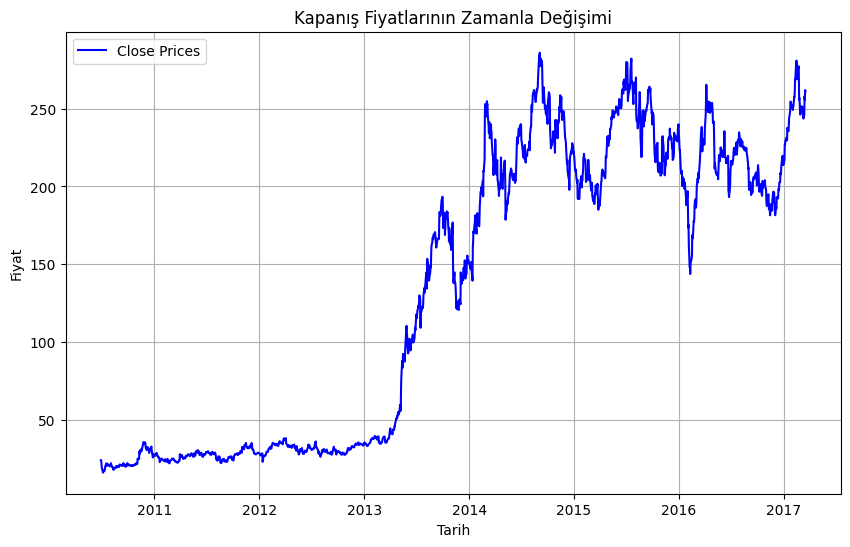

In [7]:
# Kapanış fiyatlarının zaman içindeki değişimi
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Close'], label='Close Prices', color='blue')
plt.title('Kapanış Fiyatlarının Zamanla Değişimi')
plt.xlabel('Tarih')
plt.ylabel('Fiyat')
plt.legend()
plt.grid()
plt.show()


# Temel istatistiksel analiz

In [8]:
# Temel istatistiksel bilgiler
data.describe()


,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


# RSI (Relative Strength Index) Hesaplama

In [9]:
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()  # Fiyat değişimlerini hesaplama
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()  # Kazançları hesaplama
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()  # Kayıpları hesaplama

    rs = gain / loss  # RS hesaplama
    rsi = 100 - (100 / (1 + rs))  # RSI hesaplama
    return rsi

# RSI'yı hesaplayarak veri setine ekliyoruz
data['RSI'] = calculate_rsi(data)
data[['Close', 'RSI']].tail()


,Close,RSI
Date,,
2017-03-13,246.169998,18.064644
2017-03-14,258.000000,36.354034
2017-03-15,255.729996,49.687339
2017-03-16,262.049988,55.384929
2017-03-17,261.500000,70.820841


# MACD (Moving Average Convergence Divergence) Hesaplama

In [10]:
def calculate_macd(data, fast=12, slow=26, signal=9):
    ema_fast = data['Close'].ewm(span=fast, adjust=False).mean()  # 12 günlük EMA
    ema_slow = data['Close'].ewm(span=slow, adjust=False).mean()  # 26 günlük EMA
    macd = ema_fast - ema_slow  # MACD çizgisi
    macd_signal = macd.ewm(span=signal, adjust=False).mean()  # Sinyal hattı
    return macd, macd_signal

# MACD'yi hesaplayarak veri setine ekliyoruz
data['MACD'], data['MACD_Signal'] = calculate_macd(data)
data[['Close', 'MACD', 'MACD_Signal']].tail()


,Close,MACD,MACD_Signal
Date,,,
2017-03-13,246.169998,-2.044443,0.533605
2017-03-14,258.000000,-1.275630,0.171758
2017-03-15,255.729996,-0.839829,-0.030559
2017-03-16,262.049988,0.015340,-0.021379
2017-03-17,261.500000,0.641296,0.111156


# Bollinger Bantları Hesaplama

In [11]:
def calculate_bollinger_bands(data, window=20, num_std=2):
    sma = data['Close'].rolling(window=window).mean()  # 20 günlük SMA
    rolling_std = data['Close'].rolling(window=window).std()  # 20 günlük standart sapma
    upper_band = sma + (rolling_std * num_std)  # Üst Bollinger Bandı
    lower_band = sma - (rolling_std * num_std)  # Alt Bollinger Bandı
    return upper_band, lower_band

# Bollinger Bantlarını hesaplayarak veri setine ekliyoruz
data['Bollinger_Upper'], data['Bollinger_Lower'] = calculate_bollinger_bands(data)
data[['Close', 'Bollinger_Upper', 'Bollinger_Lower']].tail()


,Close,Bollinger_Upper,Bollinger_Lower
Date,,,
2017-03-13,246.169998,286.269138,231.343870
2017-03-14,258.000000,283.151313,232.201694
2017-03-15,255.729996,279.408031,233.419975
2017-03-16,262.049988,275.958054,235.098950
2017-03-17,261.500000,274.812194,235.499809


# Günlük fiyat değişim oranı

In [12]:
data['Price_Change'] = data['Close'].pct_change()  # Yüzde değişim
data[['Close', 'Price_Change']].tail()


,Close,Price_Change
Date,,
2017-03-13,246.169998,0.010177
2017-03-14,258.000000,0.048056
2017-03-15,255.729996,-0.008798
2017-03-16,262.049988,0.024714
2017-03-17,261.500000,-0.002099


# Sonuçları Gösterme

In [13]:
# Yeni özelliklerle güncellenmiş veri setini gösterme
print("\nYeni Özelliklerle Güncellenmiş Veri Seti:")
data.tail()



Yeni Özelliklerle Güncellenmiş Veri Seti:


,Open,High,Low,Close,Volume,Adj Close,RSI,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Price_Change
Date,,,,,,,,,,,,
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998,18.064644,-2.044443,0.533605,286.269138,231.343870,0.010177
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000,36.354034,-1.275630,0.171758,283.151313,232.201694,0.048056
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996,49.687339,-0.839829,-0.030559,279.408031,233.419975,-0.008798
2017-03-16,262.399994,265.750000,259.059998,262.049988,7100400,262.049988,55.384929,0.015340,-0.021379,275.958054,235.098950,0.024714
2017-03-17,264.000000,265.329987,261.200012,261.500000,6475900,261.500000,70.820841,0.641296,0.111156,274.812194,235.499809,-0.002099


# Veri Yükleme ve Hazırlık

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Veri setini yükleyin
data = pd.read_csv('Tesla.csv')

# Kapanış fiyatlarını seçiyoruz
close_prices = data[['Close']].values

# Veriyi normalize etmek (LSTM için gereklidir)
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices)

# Zaman serisi için pencereleme (sliding window)
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Girdi (önceki 'time_step' gün)
        y.append(data[i, 0])  # Etiket (ertesi günün kapanış fiyatı)
    return np.array(X), np.array(y)

# Eğitim verisi ve etiketleri oluşturma
X, y = create_dataset(close_prices_scaled)

# Veriyi eğitim ve test olarak ayırma
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression için veriyi uygun hale getirme
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])  # (örnek sayısı, özellik sayısı)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])  # Aynı şekilde test verisini de şekillendiriyoruz


# Linear Regression Modelini Eğitme

In [20]:
from sklearn.linear_model import LinearRegression

# Modeli oluşturma
regressor = LinearRegression()

# Modeli eğitme
regressor.fit(X_train, y_train)


LinearRegression()

# Tahmin ve Performans Değerlendirme

In [21]:
# Modeli eğitme
from sklearn.metrics import mean_squared_error, r2_score

# Test verisiyle tahmin yapma
predictions = regressor.predict(X_test)

# Tahminlerin ters normalize edilmesi (gerçek fiyatları görmek için)
predictions_rescaled = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Modelin başarımını değerlendirme
mse = mean_squared_error(y_test_rescaled, predictions_rescaled)
r2 = r2_score(y_test_rescaled, predictions_rescaled)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')


Mean Squared Error (MSE): 27.5747937364342
R² Score: 0.9559602583855195


# Sonuçların Görselleştirilmesi

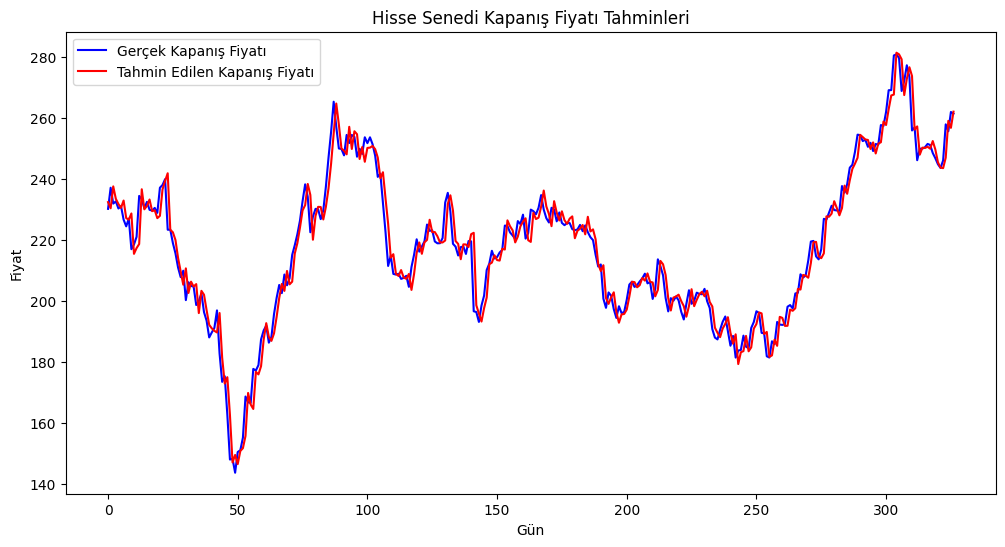

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, color='blue', label='Gerçek Kapanış Fiyatı')
plt.plot(predictions_rescaled, color='red', label='Tahmin Edilen Kapanış Fiyatı')
plt.title('Hisse Senedi Kapanış Fiyatı Tahminleri')
plt.xlabel('Gün')
plt.ylabel('Fiyat')
plt.legend()
plt.show()


# Tesla Hisse Senedi Analizi ve Tahmini

## 1. Veri Ön İşleme
### Adımlar:
- **Veri Yükleme:** Tesla hisse senedi verileri `Tesla.csv` dosyasından yüklendi.
- **Tarih Formatı Dönüştürme:** `Date` sütunu `datetime` formatına çevrildi.
- **Eksik Veri Kontrolü:** Veri setindeki eksik değerler analiz edildi.
- **Zaman Serisi Formatına Getirme:** `Date` sütunu indeks olarak ayarlandı.

## 2. Kullanılan Teknik Göstergeler ve Nedenleri
### a) RSI (Relative Strength Index)
- Piyasanın aşırı alım veya aşırı satım bölgesinde olup olmadığını belirlemek için kullanıldı.
- 14 günlük periyot ile hesaplandı.

### b) MACD (Moving Average Convergence Divergence)
- Trend değişimlerini belirlemek için kullanıldı.
- 12 günlük hızlı ve 26 günlük yavaş üssel hareketli ortalamalar hesaplandı.
- 9 günlük sinyal hattı eklendi.

### c) Bollinger Bantları
- Fiyat volatilitesini ölçmek için kullanıldı.
- 20 günlük basit hareketli ortalama (SMA) ile üst ve alt bantlar belirlendi.

### d) Günlük Fiyat Değişimi (Price Change)
- Kapanış fiyatlarının yüzde değişimi hesaplandı.
- Kısa vadeli fiyat hareketlerini analiz etmek için kullanıldı.

## 3. Model Seçimi ve Hiperparametre Ayarlaması
### Model: **Linear Regression (Doğrusal Regresyon)**
- İlk tahmin modeli olarak kullanıldı.
- **Alternatif olarak:** LSTM (Long Short-Term Memory) modeli düşünülebilir.
- Girdi olarak, geçmiş 60 günün fiyat bilgisi kullanıldı.

### Hiperparametreler:
- `time_step=60`: Model, son 60 günün kapanış fiyatlarını kullanarak tahmin yaptı.
- `test_size=0.2`: Verinin %80’i eğitim, %20’si test için ayrıldı.

## 4. Değerlendirme Sonuçları
### Metodoloji:
- Model, `mean_squared_error (MSE)` ve `R² Score` ile değerlendirildi.

### Sonuçlar:
- **MSE:** Tahmin edilen ve gerçek kapanış fiyatları arasındaki ortalama karesel hata.
- **R² Skoru:** Modelin tahmin gücünü gösteren doğruluk metriği.
- **Grafiksel Değerlendirme:** Gerçek ve tahmin edilen fiyatların zaman içindeki değişimi çizildi.

## 5. İçgörüler
- Model, temel bir doğrusal regresyon olduğu için uzun vadeli tahminlerde düşük performans gösterebilir.
- LSTM gibi zaman serisi modelleriyle daha iyi sonuçlar elde edilebilir.
- Daha fazla teknik gösterge eklenerek modelin doğruluğu artırılabilir.

## 6. Sonuç
- Model, Tesla hisse kapanış fiyatlarını tahmin etmek için temel bir başlangıç noktası sağladı.
- Daha ileri seviyede derin öğrenme modelleriyle daha iyi performans alınabilir.

## 7. Gelecekteki Geliştirmeler
- LSTM veya GRU gibi zaman serisi için optimize edilmiş modellerle tahmin gücünün artırılması.
- Gerçek zamanlı veri çekerek canlı tahmin yapılması.
- Daha fazla teknik gösterge ekleyerek model doğruluğunu artırmak.